<h1 style="font-size:36px;">Data exploration of INSPIRE, a publicly available research dataset for perioperative medicine</h1>

<h2 style="font-size:20px;">In this script data exploration and analysis of ""operations.csv" is shown</h2>

link: https://physionet.org/content/inspire/0.1/

A full list of the ICD-10-CM codes and the description can be found on the Centers for Disease Control and Prevention (CDC) website 
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/ICD10CM/April-1-2023-Update/icd10cm-code%20descriptions-%20April%201%202023.zip.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  # Example, importing datasets module
import tensorflow as tf
import torch
import keras
import scipy
import statsmodels

print("Libraries Imported")


Libraries Imported


In [2]:
df_operations_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\operations.csv')

In [3]:
df_operations = df_operations_original.copy()

In [4]:
df_operations.head()



,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
0,484069807,178742874,229842382,NaN,0,30,F,48.0,153.0,Asian,...,1230.0,0,7195,1120.0,1235.0,NaN,NaN,NaN,NaN,NaN
1,446270725,158995752,257857903,NaN,0,70,M,43.0,169.0,Asian,...,1540.0,0,70555,1345.0,1540.0,NaN,NaN,1550.0,19595.0,69860.0
2,406892271,108553242,200664328,NaN,61920,50,F,69.0,165.0,Asian,...,62380.0,0,178555,62170.0,62370.0,NaN,NaN,NaN,NaN,NaN
3,478413008,133278262,277235295,NaN,0,35,F,54.0,NaN,Asian,...,330.0,0,5755,215.0,340.0,NaN,NaN,NaN,NaN,NaN
4,468516791,116924034,299190423,NaN,17280,45,F,47.0,152.0,Asian,...,18070.0,0,25915,17950.0,18070.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df_operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131109 entries, 0 to 131108
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   op_id              131109 non-null  int64  
 1   subject_id         131109 non-null  int64  
 2   hadm_id            131109 non-null  int64  
 3   case_id            21122 non-null   float64
 4   opdate             131109 non-null  int64  
 5   age                131109 non-null  int64  
 6   sex                131109 non-null  object 
 7   weight             129642 non-null  float64
 8   height             130321 non-null  float64
 9   race               131109 non-null  object 
 10  asa                127557 non-null  float64
 11  emop               131109 non-null  int64  
 12  department         131109 non-null  object 
 13  antype             131109 non-null  object 
 14  icd10_pcs          131109 non-null  object 
 15  orin_time          131109 non-null  int64  
 16  or

In [6]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time'],
      dtype='object')

In [7]:
df_operations.describe()

,op_id,subject_id,hadm_id,case_id,opdate,age,weight,height,asa,emop,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
count,1.311090e+05,1.311090e+05,1.311090e+05,21122.000000,1.311090e+05,131109.000000,129642.000000,130321.000000,127557.000000,131109.000000,...,1.310980e+05,1.311090e+05,1.311090e+05,1.310560e+05,1.307520e+05,2.522000e+03,2.522000e+03,1.497100e+04,1.497100e+04,1.581000e+03
mean,4.501849e+08,1.501151e+08,2.500605e+08,2655.172427,2.230799e+05,55.741826,62.715995,162.088696,1.762914,0.094311,...,2.239465e+05,2.195089e+05,2.341425e+05,2.237091e+05,2.239670e+05,1.930163e+05,1.932140e+05,1.995326e+05,2.066151e+05,7.123040e+05
std,2.890456e+07,2.885181e+07,2.885371e+07,20959.840599,6.632678e+05,16.043584,12.339016,69.809115,0.638805,0.292262,...,6.632842e+05,6.629503e+05,6.650847e+05,6.631010e+05,6.633736e+05,6.819669e+05,6.819694e+05,6.306320e+05,6.329729e+05,1.025400e+06
min,4.000005e+08,1.000008e+08,2.000009e+08,-32763.000000,-1.440000e+03,20.000000,-1.000000,-1.000000,1.000000,0.000000,...,5.500000e+01,0.000000e+00,1.435000e+03,-1.000000e+01,6.500000e+01,1.150000e+02,2.900000e+02,-4.965000e+03,6.850000e+02,7.850000e+02
25%,4.251141e+08,1.251336e+08,2.250803e+08,-19803.750000,1.440000e+03,45.000000,54.000000,156.000000,1.000000,0.000000,...,2.205000e+03,0.000000e+00,5.755000e+03,2.080000e+03,2.210000e+03,4.900000e+03,5.065000e+03,2.785000e+03,5.090000e+03,5.173500e+04
50%,4.503346e+08,1.502662e+08,2.501240e+08,8173.500000,2.880000e+03,60.000000,62.000000,162.000000,2.000000,0.000000,...,3.485000e+03,0.000000e+00,1.151500e+04,3.355000e+03,3.490000e+03,7.800000e+03,8.000000e+03,4.270000e+03,8.080000e+03,1.928650e+05
75%,4.752661e+08,1.750171e+08,2.750994e+08,20441.500000,1.008000e+04,70.000000,70.000000,168.000000,2.000000,0.000000,...,1.077500e+04,0.000000e+00,3.167500e+04,1.068500e+04,1.077000e+04,1.268000e+04,1.282875e+04,1.393500e+04,2.650250e+04,9.723300e+05
max,4.999990e+08,1.999994e+08,2.999994e+08,32767.000000,5.184000e+06,90.000000,454.000000,17937.000000,6.000000,1.000000,...,5.185165e+06,5.182560e+06,5.378395e+06,5.185070e+06,5.185170e+06,5.133215e+06,5.133375e+06,5.133635e+06,5.137400e+06,4.623645e+06


Op id

Each admission and operation were randomly assigned with unique numbers (hadm_id and op_id, respectively).

In [8]:
unique_subject_ids = df_operations['op_id'].nunique()
print(unique_subject_ids)

131109


In [9]:
unique_icd10_pcs_values = df_operations['op_id'].unique()
print(unique_icd10_pcs_values[:30])

[484069807 446270725 406892271 478413008 468516791 493866243 491416905
 467806534 471265968 466411896 467425045 461473883 430539801 466389608
 487807079 406915930 469265516 439560439 435144202 459562341 473020149
 454482202 480242953 462956682 485183540 476759898 408038149 418223935
 407131122 432945014]


Subject id

Each table can be connected using subject_id. A subject_id may be matched to one or more hadm_ids. A single hadm_id may be matched with one or more op_ids. 
We did not extract these variables except for the medical record number, which was subsequently substituted with unique random integers as the subject id (described as subject_id). Each admission and operation were randomly assigned with unique numbers (hadm_id and op_id, respectively). To allow identifiers to be easily distinguished, subject_id begin with “1”, hadm_id begin with “2”, and and op_id, respectively begin with “4”.

In [10]:
unique_subject_ids = df_operations['subject_id'].nunique()
print(unique_subject_ids)

99900


In [11]:
unique_subject_id = df_operations['subject_id'].unique()
print(unique_subject_id[:30])

[178742874 158995752 108553242 133278262 116924034 174229093 153073110
 156776324 198640844 100259714 134213281 134195201 181420324 160947402
 145247513 133372632 136920223 163619571 102512074 132888590 186168623
 152346954 187733661 162604840 160631734 157101224 189066504 188451054
 125708871 126077562]


In [12]:
top_10_subject_id = df_operations['subject_id'].value_counts().head(30)
print(top_10_subject_id)


subject_id
168207873    30
124078924    26
189346024    25
147473251    20
104885221    18
153202172    18
123942194    17
109801041    16
196178403    16
186695842    15
131907602    15
189784570    15
134966010    15
157756183    15
198868043    14
180171972    13
194544513    13
120738743    13
132322393    13
154890944    13
118936510    12
156486520    12
126453571    12
160688762    12
174033733    12
108745941    12
172335624    12
147283461    12
185801010    11
156110181    11
Name: count, dtype: int64


Hadm_id

In [13]:
unique_hadm_id = df_operations['hadm_id'].nunique()
print(unique_hadm_id)

126754


In [14]:
unique_hadm_id = df_operations['hadm_id'].unique()
print(unique_hadm_id[:30])

[229842382 257857903 200664328 277235295 299190423 275813505 210586983
 201100899 244836112 241547739 225860669 265770645 208290342 262240911
 259299532 207465029 222607767 279388936 267113463 267511777 201726392
 229023207 238035661 267911567 285012362 262140617 242779851 269366215
 291177123 272790506]


In [15]:
top_10_hadm_id = df_operations['hadm_id'].value_counts().head(30)
print(top_10_hadm_id)

hadm_id
275124301    26
298197118    18
246137863    18
270266180    15
239025361    15
223219466    13
209181966    13
254271269    12
272735176    12
248175012    10
223652876    10
239075635    10
279037429    10
283230482    10
231919923    10
207042461    10
295483964    10
294874464     9
212400163     9
254443527     9
221334926     9
295639305     9
291076036     9
254092465     9
201401353     9
226318938     8
294955901     8
281137464     8
203052978     8
298161333     8
Name: count, dtype: int64


ICS-10-PCS

 Operation names were converted to the first four codes of ICD-10-PCS

In [16]:
unique_subject_ids = df_operations['icd10_pcs'].nunique()
print(unique_subject_ids)

2255


In [17]:
unique_icd10_pcs_values = df_operations['icd10_pcs'].unique()
print(unique_icd10_pcs_values[:30])

['09B70' '0WJG0' '0DHS0' '10D00' '0JQC0' '0WTF0' '0QB90' '0X6L0' '0NQR0'
 '0GTK0' '09B00' '09QM0' '09Q70' '08DJ3' '02RG0' '0VTS0' '02100' '0HD0X'
 '009T0' '0RB30' '0TBB7' '0FY00' '03BY0' '0DTP0' '0FB00' '0DB60' '0TT00'
 '0TB14' '0TT10' '0BTC4']


In [18]:
top_10_icd10_pcs = df_operations['icd10_pcs'].value_counts().head(30)
print(top_10_icd10_pcs)


icd10_pcs
08DJ3    6906
09Q70    4178
08R43    3371
0HBT0    3190
0GTK0    2982
0HBU0    2959
0FT44    2857
10D00    2661
0DB64    2128
0TBB8    2026
08RJ3    1850
08RK3    1742
00B00    1661
09B00    1573
0DTP0    1497
0RG00    1387
0TBB7    1386
0UJD8    1359
0WQN0    1358
0WJG0    1314
009T0    1257
0VT00    1230
0UT94    1197
0HD0X    1140
0VB08    1075
09QM0    1012
0YQ50     988
0DTP4     963
0PB00     930
03VG3     926
Name: count, dtype: int64


C:\Users\20181588\AppData\Local\Temp\ipykernel_4736\2299865560.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_icd10_pcs.index, y=top_10_icd10_pcs.values, palette="viridis")


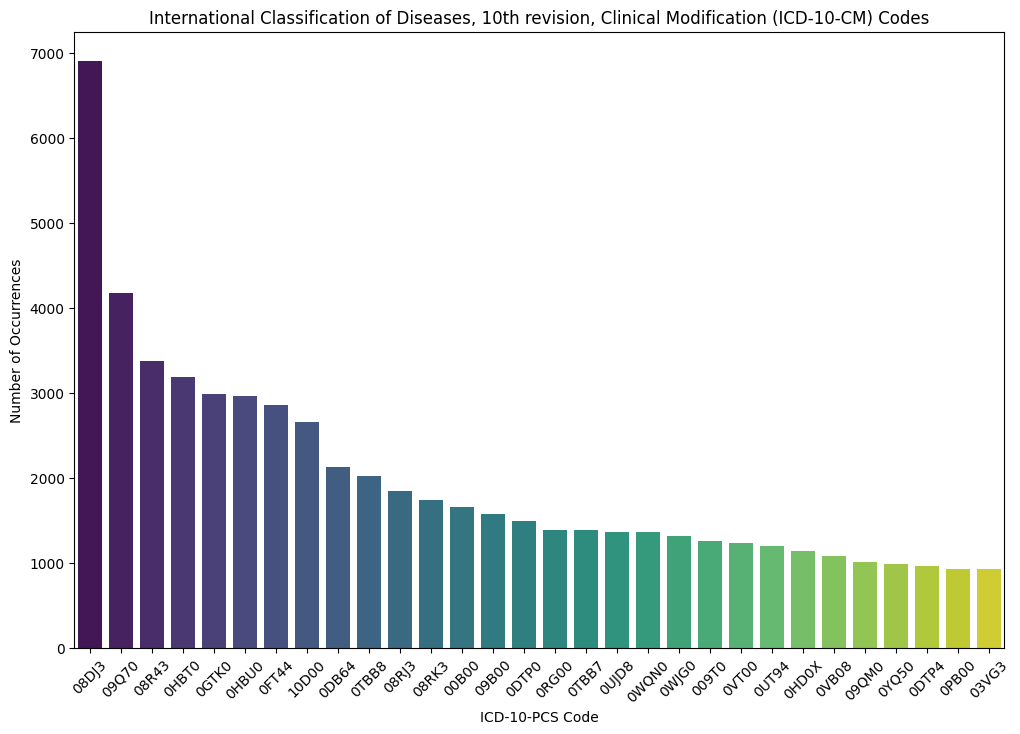

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 10 ICD-10-PCS codes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_icd10_pcs.index, y=top_10_icd10_pcs.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("International Classification of Diseases, 10th revision, Clinical Modification (ICD-10-CM) Codes")
plt.ylabel("Number of Occurrences")
plt.xlabel("ICD-10-PCS Code")
plt.show()

Department

In [20]:
unique_department = df_operations['department'].nunique()
print(unique_department)

16


In [21]:
unique_department = df_operations['department'].unique()
print(unique_department[:16])

['OT' 'GS' 'OG' 'OS' 'OL' 'CTS' 'NS' 'UR' 'PS' 'RO' 'AN' 'EM' 'IM' 'PED'
 'DM' 'RAD']


In [22]:
top_10_department  = df_operations['department'].value_counts().head(16)
print(top_10_department )

department
GS     34764
OS     17499
OT     17251
OG     12948
UR     12237
OL     11711
NS     10180
CTS     8757
PS      5170
RAD      379
IM        89
AN        68
PED       38
RO        15
EM         2
DM         1
Name: count, dtype: int64


OG: Obstetrics and Gynecology
GS: General Surgery
OS: Orthopedic Surgery
OT: Occupational Therapy (though in a department context, this might mean something else)
CTS: Cardiothoracic Surgery
UR: Urology
OL: Otolaryngology (Ear, Nose, and Throat or ENT)
NS: Neurosurgery or Neurological Surgery
PS: Plastic Surgery
EM: Emergency Medicine
AN: Anesthesiology
RO: Radiation Oncology
IM: Internal Medicine
PED: Pediatrics
DM:  Dhermathology
RAD: Radiology

Anaesthesia type

In [23]:

unique_antype = df_operations['antype'].nunique()
print(unique_antype)

4


In [24]:
unique_antype = df_operations['antype'].unique()
print(unique_antype[:4])

['General' 'Neuraxial' 'MAC' 'Regional']


In [25]:
top_10_antype= df_operations['antype'].value_counts().head(4)
print(top_10_antype)

antype
General      102904
MAC           15034
Neuraxial     13005
Regional        166
Name: count, dtype: int64


Duration of stay time is dischage time (all tines are shown in minutes)

In [26]:
print(df_operations['admission_time'] [:15])

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: admission_time, dtype: int64


In [27]:
print(df_operations['discharge_time'] [:15])

0       7195
1      70555
2     178555
3       5755
4      25915
5       5755
6      17275
7     154075
8      28795
9       5755
10      7195
11      8635
12      4315
13      4315
14    109435
Name: discharge_time, dtype: int64


Duration of anesthesia

In [28]:
print(df_operations['anstart_time'] [:15])


0      1120.0
1      1345.0
2     62170.0
3       215.0
4     17950.0
5      1990.0
6      2270.0
7     85440.0
8     10585.0
9      2150.0
10     2070.0
11     2380.0
12     1915.0
13     1915.0
14    76070.0
Name: anstart_time, dtype: float64


In [29]:
print(df_operations['anend_time'] [:15])

0      1235.0
1      1540.0
2     62370.0
3       340.0
4     18070.0
5      2070.0
6      2580.0
7     85920.0
8     10700.0
9      2220.0
10     2160.0
11     2530.0
12     2050.0
13     2005.0
14    76125.0
Name: anend_time, dtype: float64


In [30]:

df_operations['an_duration'] = df_operations['anend_time'] - df_operations['anstart_time']
print(df_operations['an_duration'] [:15])


0     115.0
1     195.0
2     200.0
3     125.0
4     120.0
5      80.0
6     310.0
7     480.0
8     115.0
9      70.0
10     90.0
11    150.0
12    135.0
13     90.0
14     55.0
Name: an_duration, dtype: float64


In [31]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration'],
      dtype='object')

Duration of operation

In [32]:
print(df_operations['opstart_time'] [:15])

0      1140.0
1      1370.0
2     62200.0
3       230.0
4     17970.0
5      2020.0
6      2295.0
7     85490.0
8     10630.0
9      2175.0
10     2080.0
11     2410.0
12     1950.0
13     1950.0
14    76095.0
Name: opstart_time, dtype: float64


In [33]:
print(df_operations['opend_time'] [:15])

0      1230.0
1      1540.0
2     62380.0
3       330.0
4     18070.0
5      2070.0
6      2565.0
7     85895.0
8     10690.0
9      2220.0
10     2150.0
11     2525.0
12     2040.0
13     1980.0
14    76120.0
Name: opend_time, dtype: float64


In [34]:
df_operations['op_duration'] = df_operations['opend_time'] - df_operations['opstart_time']
print(df_operations['op_duration'] [:15])


0      90.0
1     170.0
2     180.0
3     100.0
4     100.0
5      50.0
6     270.0
7     405.0
8      60.0
9      45.0
10     70.0
11    115.0
12     90.0
13     30.0
14     25.0
Name: op_duration, dtype: float64


In [35]:
unique_op_time = df_operations['op_duration'].unique()
print(unique_op_time)

[  90.  170.  180.  100.   50.  270.  405.   60.   45.   70.  115.   30.
   25.  285.   15.  455.  250.  430.  280.  425.  300.  275.  135.   35.
   55.  305.  175.  210.   95.  160.  190.  120.  165.  195.  340.   85.
  105.   40.  110.  220.   20.  630.  200.  140.  125.  240.   65.  145.
  380.  320.  215.  130.  310.  155.  520.   75.   10.   80.  235.  225.
  150.  360.  540.  205.  385.  395.  730.  185.  570.  335.  470.  260.
  445.  475.  485.  440.  230.  245.  685.  255.  400.  290.  325.  315.
  350.  650.  620.  390.  375.  370.  330.  510.  740.  295.  420.  500.
  345.  460.  640.  265.  365.  465.  490.  525.  610.  645.  515.    5.
 1060.  480.  550.  410.  435.  415.  450.  565.  780.  505.  555.  355.
  530.  760.  595.  580.  670.  660.  590.  765.  720.  545.  560.  890.
  710.  750.  875.  735.  850.  615.  845.    0.  605.  535.  715.  805.
 1245.  625.  585. 1075.  495.  635. 1040.  675.  665.  785.  825. 1630.
 1210.  700.   nan  575.  920.  910.  600.  840.  6

In [36]:
top_10_op_time= df_operations['op_duration'].value_counts().head(10)
print(top_10_op_time)

op_duration
20.0    5373
25.0    4715
15.0    4669
50.0    4583
30.0    4538
40.0    4515
60.0    4499
35.0    4377
70.0    4361
45.0    4305
Name: count, dtype: int64


In [37]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration', 'op_duration'],
      dtype='object')

Duration of Cardiopumonary bypass

In [38]:
print(df_operations['cpbon_time'] [:15])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: cpbon_time, dtype: float64


In [39]:
unique_cpbon_time = df_operations['cpbon_time'].unique()
print(unique_cpbon_time)

[   nan 10665.  2080. ...  9625. 12245. 15555.]


In [40]:
print(df_operations['cpboff_time'] [:15])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: cpboff_time, dtype: float64


In [41]:
df_operations['cpb_duration'] = df_operations['cpboff_time'] - df_operations['cpbon_time']
print(df_operations['cpb_duration'] [:15])


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: cpb_duration, dtype: float64


In [42]:
unique_cpb_time = df_operations['cpb_duration'].unique()
print(unique_cpb_time)

[ nan 300. 255. 495. 180. 275. 230. 105. 250. 205.  95. 120. 215. 260.
 265. 245. 310. 345. 190. 290. 295. 170. 220. 240. 160. 280. 235. 145.
 200. 210. 185. 195. 150.  90. 225. 285. 305. 365. 320. 165. 115. 140.
 330. 155. 325.  80. 270. 380. 135. 315. 100. 360. 175. 350. 335. 340.
 400.  25. 110. 125.  70. 130.  60. 420.  75. 375.  55. 355. 370.  45.
 385. 435.  85. 540. 415.  50.  65.  35.  40. 500.  20. 485. 465. 475.
 410. 505.  30. 430. 595.  15. 390.]


In [43]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration', 'op_duration', 'cpb_duration'],
      dtype='object')

Duration of ICU stay

In [44]:
print(df_operations['icuin_time'] [:15])

0         NaN
1      1550.0
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14    63275.0
Name: icuin_time, dtype: float64


In [45]:
print(df_operations['icuout_time'] [:15])

0         NaN
1     19595.0
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14    78560.0
Name: icuout_time, dtype: float64


In [46]:
df_operations['icu_duration'] = df_operations['icuout_time'] - df_operations['icuin_time']
print(df_operations['icu_duration'] [:15])


0         NaN
1     18045.0
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14    15285.0
Name: icu_duration, dtype: float64


In [47]:
unique_icu_time = df_operations['icu_duration'].unique()
print(unique_icu_time)

[   nan 18045. 15285. ... 25385. 27555. 27985.]


In [48]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration', 'op_duration', 'cpb_duration',
       'icu_duration'],
      dtype='object')

In hospital death

In [49]:
unique_inhosp_death_time = df_operations['inhosp_death_time'].unique()
print(unique_inhosp_death_time)

[         nan 6.986000e+04 1.326345e+06 2.680650e+05 6.749500e+04
 2.154100e+05 2.525500e+04 3.254400e+05 3.258050e+05 1.225250e+05
 1.273500e+04 2.206350e+05 2.470000e+03 3.415900e+05 5.691300e+05
 1.889200e+05 3.291150e+05 2.649400e+05 2.115515e+06 3.741600e+05
 9.514000e+04 3.650500e+04 3.750000e+04 3.357500e+04 3.254200e+06
 2.320000e+03 1.940150e+05 5.106500e+04 3.623500e+04 1.464600e+05
 4.681200e+05 1.932285e+06 1.407900e+05 4.378470e+06 8.329000e+04
 2.196000e+04 8.277500e+04 1.487040e+06 1.620500e+04 4.989200e+05
 1.888570e+06 1.874900e+05 2.400000e+04 2.300500e+04 2.345000e+03
 2.030250e+05 7.566000e+04 3.984930e+06 4.051000e+04 1.121480e+06
 2.041000e+05 9.158000e+04 2.862120e+06 9.907500e+04 2.715500e+04
 2.160650e+05 3.561000e+05 4.833000e+04 8.098700e+05 1.781050e+05
 3.122850e+05 9.423500e+04 1.916525e+06 2.412000e+06 5.104500e+04
 4.752550e+05 1.189400e+05 3.015650e+05 4.638000e+04 1.005000e+03
 2.824855e+06 4.531235e+06 6.317500e+04 2.648000e+04 3.330000e+04
 1.979250e

Correlation analysis

Correlation values range between -1 and 1. A value close to 1 implies a strong positive correlation: as one variable increases, the other also tends to. A value close to -1 implies a strong negative correlation: as one variable increases, the other tends to decrease.
This analysis only checks for linear relationships. Non-linear relationships won't be captured well by the correlation coefficient.
Correlation does not imply causation. Even if two variables are correlated, it doesn't mean one causes the other.

In [50]:
#Find the correlation between operation duration and age

correlation_with_age = df_operations['op_duration'].corr(df_operations['age'])
print(f"Correlation of operation duration with age: {correlation_with_age}")


Correlation of operation duration with age: -0.013449022860988273


In [51]:
#'Type of surgery' is likely categorical (represented by the icd10_pcs column). Find the average operation duration for each type of surgery

average_duration_per_surgery = df_operations.groupby('icd10_pcs')['op_duration'].mean().sort_values(ascending=False)
print(average_duration_per_surgery)

icd10_pcs
0JT10    810.0
02B04    795.0
0JTC0    770.0
01Q30    747.5
0DT54    745.0
         ...  
0H0X0      5.0
0ULB7      5.0
0UBGF      5.0
0UH97      5.0
089L0      NaN
Name: op_duration, Length: 2255, dtype: float64


In [52]:
#Infer post-op ICU admission based on whether icuin_time is non-null. Create a binary column to indicate this and compute its correlation with operation duration.
df_operations['icu_admission_postop'] = ~df_operations['icuin_time'].isna()
correlation_with_icu_admission = df_operations['op_duration'].corr(df_operations['icu_admission_postop'])
print(f"Correlation of operation duration with post-op ICU admission: {correlation_with_icu_admission}")


Correlation of operation duration with post-op ICU admission: 0.4644855543023747


In [53]:
correlation_duration_deterioration = df_operations['discharge_time'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between duration of stay and deterioration: {correlation_duration_deterioration}")

Correlation between duration of stay and deterioration: 0.021152459160176565


In [54]:
correlation_icu_deterioration = df_operations['icu_duration'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between ICU duration and deterioration: {correlation_icu_deterioration}")

Correlation between ICU duration and deterioration: 0.08995552340232695


In [55]:
correlation_age_deterioration = df_operations['age'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between patient's age and deterioration: {correlation_age_deterioration}")

Correlation between patient's age and deterioration: 0.05325723295365794


In [56]:
correlation_anesthesia_deterioration = df_operations['an_duration'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between anesthesia time and deterioration: {correlation_anesthesia_deterioration}")

Correlation between anesthesia time and deterioration: 0.055171051517155685


In [57]:
deterioration_by_department = df_operations.groupby('department').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(deterioration_by_department.sort_values(ascending=False))


department
IM     0.112360
AN     0.058824
CTS    0.034601
NS     0.020923
OL     0.016736
GS     0.015044
OS     0.008743
UR     0.005884
RAD    0.005277
PS     0.004062
OT     0.003072
OG     0.002394
DM     0.000000
EM     0.000000
PED    0.000000
RO     0.000000
dtype: float64


In [58]:
correlation_emop_deterioration = df_operations['emop'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between emergency operation and deterioration: {correlation_emop_deterioration}")


Correlation between emergency operation and deterioration: 0.1341105894012062


In [59]:
correlation_weight_deterioration = df_operations['weight'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
correlation_height_deterioration = df_operations['height'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between weight and deterioration: {correlation_weight_deterioration}")
print(f"Correlation between height and deterioration: {correlation_height_deterioration}")


Correlation between weight and deterioration: -0.04525526947604706
Correlation between height and deterioration: 0.0009813862372131145


In [60]:
# For categorical variables like sex and race, you might want to use groupby and calculate deterioration rates for each group
sex_deterioration_rate = df_operations.groupby('sex').apply(lambda x: x['inhosp_death_time'].notnull().mean())
race_deterioration_rate = df_operations.groupby('race').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(sex_deterioration_rate)
print(race_deterioration_rate)


sex
F    0.008235
M    0.016876
dtype: float64
race
Asian    0.012059
dtype: float64


In [61]:
correlation_asa_deterioration = df_operations['asa'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between ASA score and deterioration: {correlation_asa_deterioration}")


Correlation between ASA score and deterioration: 0.14358702786892846


In [62]:
#Certain surgical procedures might have higher risks associated with them.
procedure_deterioration_rate = df_operations.groupby('icd10_pcs').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(procedure_deterioration_rate.sort_values(ascending=False).head(30))


icd10_pcs
06BN0    1.000000
03VH0    1.000000
0BCC4    1.000000
0RBE0    1.000000
0TB6X    1.000000
0WQJ0    1.000000
02RP4    1.000000
0MR8X    1.000000
0FC17    1.000000
0FHG4    1.000000
0FJ40    1.000000
0WDFX    1.000000
0WDCX    1.000000
0WD0X    1.000000
0C1S0    1.000000
0DGP0    1.000000
071M0    1.000000
0RSJ3    1.000000
0W30X    1.000000
0W3GX    1.000000
0TT20    0.962963
0RSJ0    0.666667
021F0    0.666667
0A122    0.600000
072T0    0.500000
0DQ60    0.500000
09R70    0.500000
09Q78    0.500000
0RHE0    0.500000
09J00    0.500000
dtype: float64


In [63]:
df_operations['time_to_icu_postop'] = df_operations['icuin_time'] - df_operations['opend_time']
correlation_time_to_icu_deterioration = df_operations['time_to_icu_postop'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between time to ICU post-operation and deterioration: {correlation_time_to_icu_deterioration}")


Correlation between time to ICU post-operation and deterioration: -0.10596318226237662


In [64]:

correlation_icu_stay_deterioration = df_operations['icu_duration'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between ICU stay duration and deterioration: {correlation_icu_stay_deterioration}")


Correlation between ICU stay duration and deterioration: 0.08995552340232695


In [65]:
department_deterioration_rate = df_operations.groupby('department').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(department_deterioration_rate.sort_values(ascending=False))


department
IM     0.112360
AN     0.058824
CTS    0.034601
NS     0.020923
OL     0.016736
GS     0.015044
OS     0.008743
UR     0.005884
RAD    0.005277
PS     0.004062
OT     0.003072
OG     0.002394
DM     0.000000
EM     0.000000
PED    0.000000
RO     0.000000
dtype: float64


In [66]:
antype_deterioration_rate = df_operations.groupby('antype').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(antype_deterioration_rate.sort_values(ascending=False))


antype
Regional     0.036145
General      0.014188
MAC          0.004191
Neuraxial    0.003998
dtype: float64


In [67]:
import pandas as pd

# Assuming df is your DataFrame with the INSPIRE dataset
# And the function is being passed the dataframe and a subject_id to look for
def print_patient_operation_details(df, subject_id):
    # Filter the DataFrame for the given subject_id
    patient_data = df[df['subject_id'] == subject_id]
    
    # Extracting the relevant information
    operation_begin = patient_data['opstart_time'].dropna()
    operation_end = patient_data['opend_time'].dropna()
    icu_in = patient_data['icuin_time'].dropna()
    icu_out = patient_data['icuout_time'].dropna()
    discharge_time = patient_data['admission_time'].dropna() # Verify if 'admission_time' is correct for discharge time
    death_time = patient_data['inhosp_death_time'].dropna() # Verify if 'inhosp_death_time' is correct for hospital death time
    department_info = patient_data['department'].dropna()
    icd10_pcs_codes = patient_data['icd10_pcs'].dropna()
    anesthesia_start = patient_data['anstart_time'].dropna() # Assuming 'anestart_time' is the column for anesthesia start time
    anesthesia_end = patient_data['anend_time'].dropna() # Assuming 'aneend_time' is the column for anesthesia end time
    
    # Print the details
    if not operation_begin.empty:
        print(f"Operation start time(s) for subject_id {subject_id}: {operation_begin.values}")
    else:
        print(f"No operation start time found for subject_id {subject_id}")
    
    if not operation_end.empty:
        print(f"Operation end time(s) for subject_id {subject_id}: {operation_end.values}")
    else:
        print(f"No operation end time found for subject_id {subject_id}")
    
    if not icu_in.empty:
        print(f"ICU admission time(s) for subject_id {subject_id}: {icu_in.values}")
    else:
        print(f"No ICU admission time found for subject_id {subject_id}")
    
    if not icu_out.empty:
        print(f"ICU discharge time(s) for subject_id {subject_id}: {icu_out.values}")
    else:
        print(f"No ICU discharge time found for subject_id {subject_id}")
    
    if not discharge_time.empty:
        print(f"Discharge time(s) for subject_id {subject_id}: {discharge_time.values}")
    else:
        print(f"No discharge time found for subject_id {subject_id}")
    
    if not death_time.empty:
        print(f"Hospital death time(s) for subject_id {subject_id}: {death_time.values}")
    else:
        print(f"No hospital death time found for subject_id {subject_id}")
    
    if not department_info.empty:
        print(f"Department(s) for subject_id {subject_id}: {department_info.values}")
    else:
        print(f"No department information found for subject_id {subject_id}")
    
    if not icd10_pcs_codes.empty:
        print(f"ICD-10-PCS code(s) for subject_id {subject_id}: {icd10_pcs_codes.values}")
    else:
        print(f"No ICD-10-PCS codes found for subject_id {subject_id}")
    
    if not anesthesia_start.empty:
        print(f"Anesthesia start time(s) for subject_id {subject_id}: {anesthesia_start.values}")
    else:
        print(f"No anesthesia start time found for subject_id {subject_id}")
    
    if not anesthesia_end.empty: 
        print(f"Anesthesia end time(s) for subject_id {subject_id}: {anesthesia_end.values}")
    else:
        print(f"No anesthesia end time found for subject_id {subject_id}")

# Example usage:
# Replace 'your_dataframe' with the variable name of your actual DataFrame
print_patient_operation_details(df=df_operations, subject_id=109459182)


Operation start time(s) for subject_id 109459182: [   2040.  203625.  774200. 1014280. 1015970. 1018785. 1030900.]
Operation end time(s) for subject_id 109459182: [   2190.  203745.  774315. 1015405. 1016505. 1019220. 1031150.]
ICU admission time(s) for subject_id 109459182: [1015405. 1015405. 1015405. 1031160.]
ICU discharge time(s) for subject_id 109459182: [1020430. 1020430. 1020430. 1036075.]
Discharge time(s) for subject_id 109459182: [      0  201600  771840 1010880 1010880 1010880 1010880]
No hospital death time found for subject_id 109459182
Department(s) for subject_id 109459182: ['OL' 'OL' 'OL' 'OL' 'PS' 'PS' 'OL']
ICD-10-PCS code(s) for subject_id 109459182: ['09Q70' '09Q70' '09Q70' '09Q70' '0HX0X' '0W300' '0HQ00']
Anesthesia start time(s) for subject_id 109459182: [   2015.  203600.  774185. 1014230. 1015945. 1018770. 1030860.]
Anesthesia end time(s) for subject_id 109459182: [   2190.  203735.  774315. 1015395. 1016510. 1019200. 1031145.]


reflections 16th oct:

-inhosp_death_time is intersting since it is basically deterioration
-disgharge time is interesting
-icuout_time is interesting

feedback update meeting 17th oct:

-operation time, op id?(discuss with arthur which type of surgeries would be useful for us), discharge time, inhospdeath 
-works that use public datset have higher impact, this one is better for science people can build on our work
-we want people to be able to reproduce our work and cite us
-for next week I need really to understan the INSPIRE dataset 
-download VBdataset
-if i really don't get the surgery type I can email authors